# Example notebook

This is a notebook with few examples on how to read, manipulate and display images

# Necessary imports

In [ ]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import imageio

# Our imports 
!pip install tslearn
import tslearn
import numpy
import matplotlib.pyplot as plt
from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler

# Function to load the csv data as a pandas DataFrame

In [ ]:
def build_DataFrame(path):
    with open(path) as f:
        lines = f.readlines()
    mice_dict = {}
    table = []
    times = []
    for l in lines[4:]:
        values = l.strip().split(',')
        time = eval(values.pop(0))
        times.append(time)
        values = [eval(v) if v!='' else -1 for v in values]
        table.append(values)
    table = np.array(table)
    for i, (mouse, body) in enumerate(zip(lines[1].strip().split(',')[1:],
                                          lines[2].strip().split(',')[1:])):
        if i%3==0:
            val = 'x'
        elif i%3==1:
            val = 'y'
        else:
            val = 'likelyhood'
        mice_dict[mouse, body, val] = table[:, i]
    return np.array(times), pd.DataFrame(mice_dict)

# Loading the data and extracting the mice, bodyparts and coordinates names

In [ ]:
data_path = Path('data-test.csv')
times, df = build_DataFrame(data_path)
mice = df.columns.levels[0]
bodyparts = df.columns.levels[1]
coordinates = df.columns.levels[2]
print('Available bodyparts:\n\t', ', '.join(bodyparts))
print('Available mice:\n\t', ', '.join(mice))

Available bodyparts:
	 bodycentre, leftEar, lefthindlimb, nose, rightEar, righthindlimb, tailbase, tailtip
Available mice:
	 mus1, mus2, mus3, mus4, mus5


# Translating the mice (for comparison) :

In [ ]:
parts = ['leftEar', 'bodycentre', 'lefthindlimb', 'tailbase','rightEar', 'nose',  'righthindlimb', 'tailtip']
for bp in parts:
    df.loc[:, ('mus1', bp, 'x')] = df['mus1'][bp]['x'].apply(lambda x: x - 0)
    df.loc[:, ('mus2', bp, 'x')] = df['mus2'][bp]['x'].apply(lambda x: x - 80)
    df.loc[:, ('mus3', bp, 'x')] = df['mus3'][bp]['x'].apply(lambda x: x - 155)
    df.loc[:, ('mus4', bp, 'x')] = df['mus4'][bp]['x'].apply(lambda x: x - 230)
    df.loc[:, ('mus5', bp, 'x')] = df['mus5'][bp]['x'].apply(lambda x: x - 305)

# Plotting the x and y positions over time
Plotting the x and y positions of the right hind limb of the `mus3` over time with time point `tp=1500` highlighted

In [ ]:
def plot_mouse_coordinates(mouse):
  fig, ax = plt.subplots(4, 2, figsize=(15,15))
  parts = ['leftEar', 'bodycentre', 'lefthindlimb', 'tailbase','rightEar', 'nose',  'righthindlimb', 'tailtip']
  for i in range(8):
    bp = parts[i]
    x = df[mouse][bp]['x']
    y = df[mouse][bp]['y']
    l = df[mouse][bp]['likelyhood']
    mask = .5<l
    j = 0

    if i > 3:
      j = 1
    ax[i%4, j].plot(times[mask], x[mask], 'o', label='x')
    ax[i%4, j].plot(times[mask], y[mask], 'o', label='y')
    ax[i%4, j].set_title(bp)
    ax[i%4, j].legend()
    fig.tight_layout()

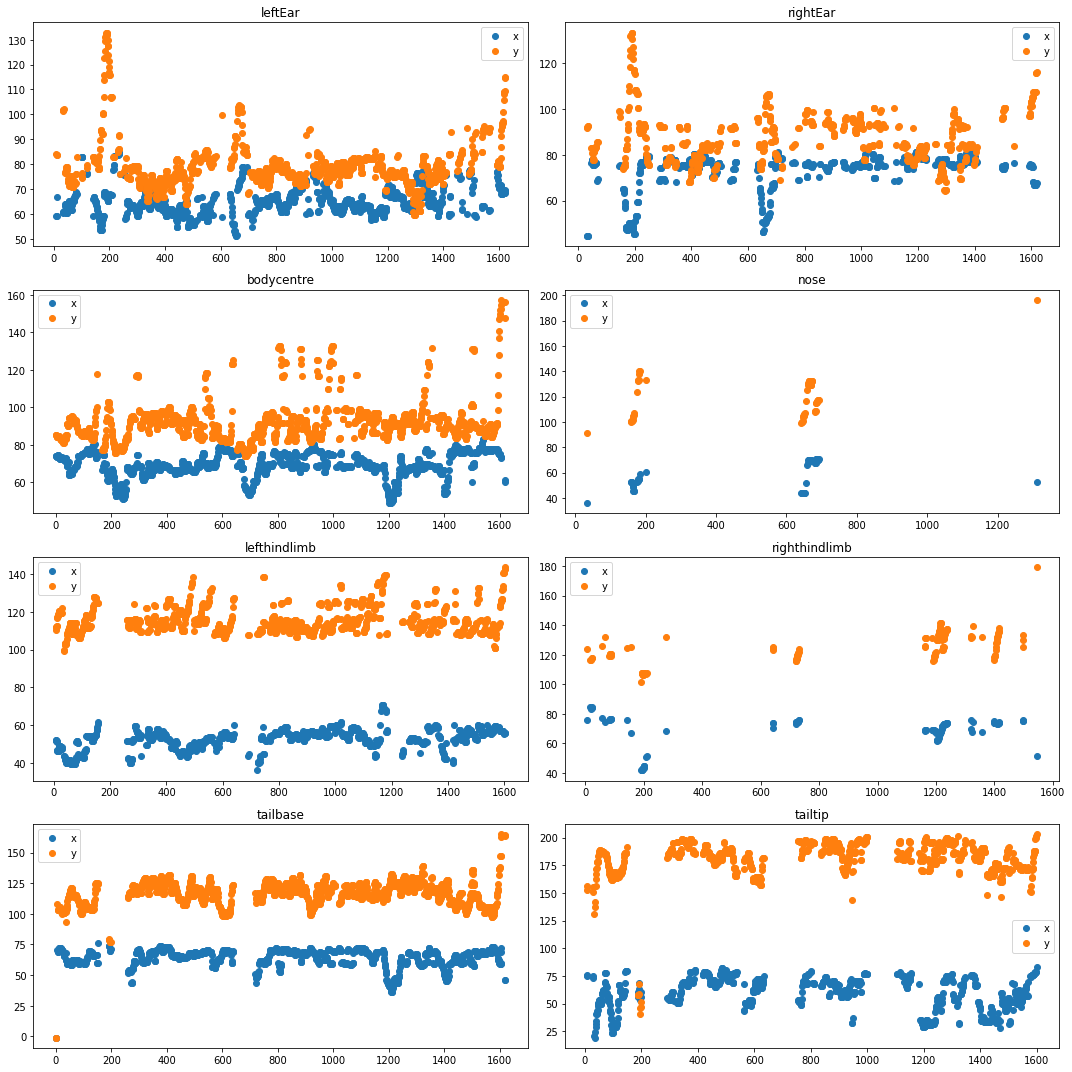

In [ ]:
plot_mouse_coordinates('mus1')

In [ ]:
def plot_mice_coordinates(bp):
  fig, ax = plt.subplots(3, 2, figsize=(10,10))
  mice = ['mus1', 'mus2', 'mus3', 'mus4', 'mus5']
  for i in range(5):
    mouse = mice[i]
    x = df[mouse][bp]['x']
    y = df[mouse][bp]['y']
    l = df[mouse][bp]['likelyhood']
    mask = .5<l
    j = 0
    if i > 2:
      j = 1
    ax[i%3, j].plot(times[mask], x[mask], 'o', label='x')
    ax[i%3, j].plot(times[mask], y[mask], 'o', label='y')
    ax[i%3, j].set_title(mouse)
    ax[i%3, j].legend()
    fig.tight_layout()

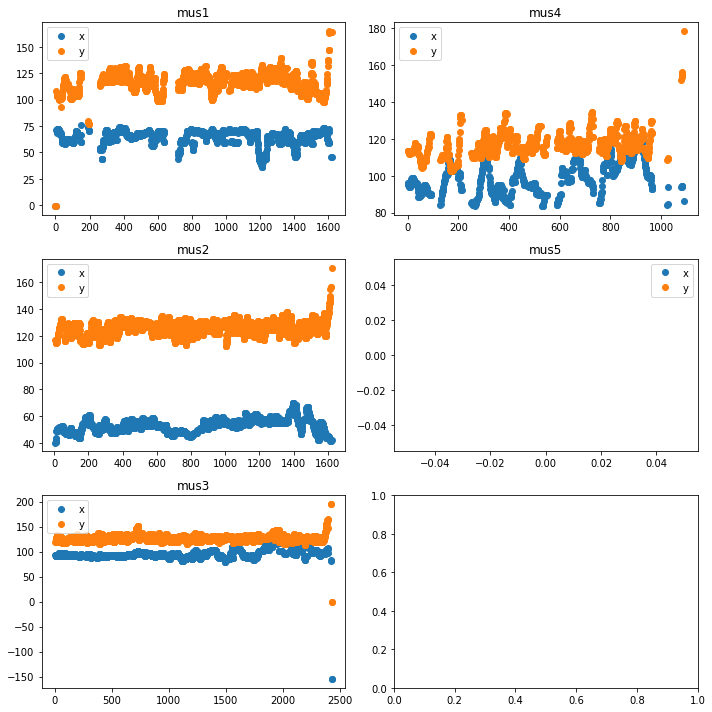

In [ ]:
plot_mice_coordinates('tailbase')

# Plotting the x __vs__ y positions over time
Plotting the x __vs__ y positions of the right hind limb of the `mus3` over time with time point `tp=1500` highlighted

In [ ]:
def plot_mice_position(mouse):
  fig, ax = plt.subplots(4, 2, figsize=(15,15), sharex=True, sharey=True)
  parts = ['leftEar', 'bodycentre', 'lefthindlimb', 'tailbase','rightEar', 'nose',  'righthindlimb', 'tailtip']
  for i in range(8):
    bp = parts[i]
    x = df[mouse][bp]['x']
    y = df[mouse][bp]['y']
    l = df[mouse][bp]['likelyhood']
    mask = .5<l
    j = 0
    if i > 3: j = 1

    sc = ax[i%4, j].scatter(x[mask], y[mask], c=times[mask], cmap='Blues', alpha=.6, facecolor=None)
    ax[i%4, j].plot(x[mask], y[mask], 'k-', zorder=0, alpha=.8)
    ax[i%4, j].set_title(bp)
    ax[i%4, j].set_aspect('equal')
    ax[i%4, j].set_title(bp)



  #fig.colorbar(sc, ax=ax, shrink=.5, label='Likelyhood', ticks=[min(l[mask]), 1],
  #           format='%.1f', drawedges=False)
  fig.tight_layout()

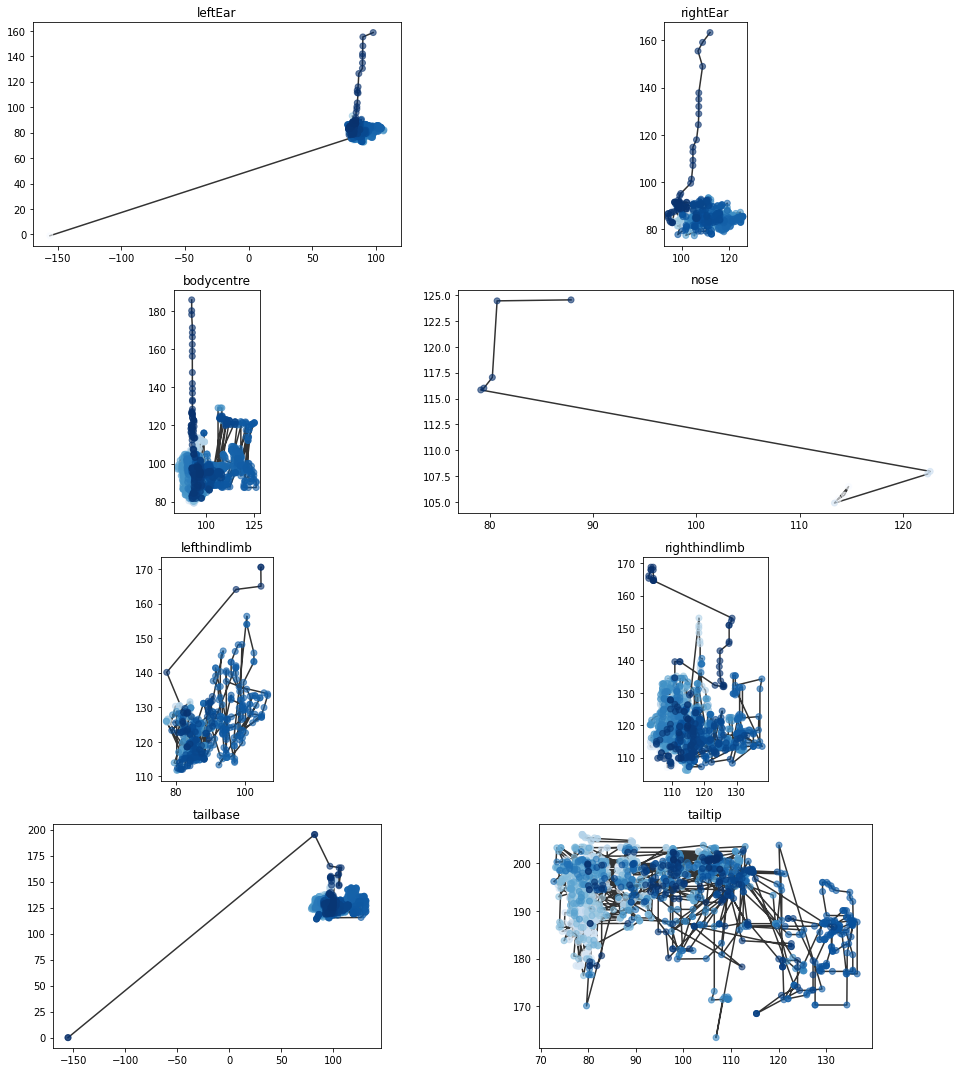

In [ ]:
plot_mice_position('mus3')

In [ ]:
bp = 'righthindlimb'
mouse = 'mus3'
tp = 1500
fig, ax = plt.subplots(figsize=(20, 16))
x = df[mouse][bp]['x']
y = df[mouse][bp]['y']
l = df[mouse][bp]['likelyhood']
mask = .5<l
sc = ax.scatter(x[mask], y[mask], c=l[mask], cmap='viridis', alpha=.6, facecolor=None)
ax.plot(x[mask], y[mask], 'k-', zorder=0, alpha=.8)
fig.colorbar(sc, ax=ax, shrink=.5, label='Likelyhood', ticks=[min(l[mask]), 1],
             format='%.1f', drawedges=False)
ax.set_title(mouse)
ax.set_aspect('equal')
fig.tight_layout()

# Reading the video

In [ ]:
vid = imageio.get_reader('movie-test.mp4',  'ffmpeg')

# Plotting on the video
Plotting the x, y position of the right hind limb of `mus3` around time point `tp=1500`

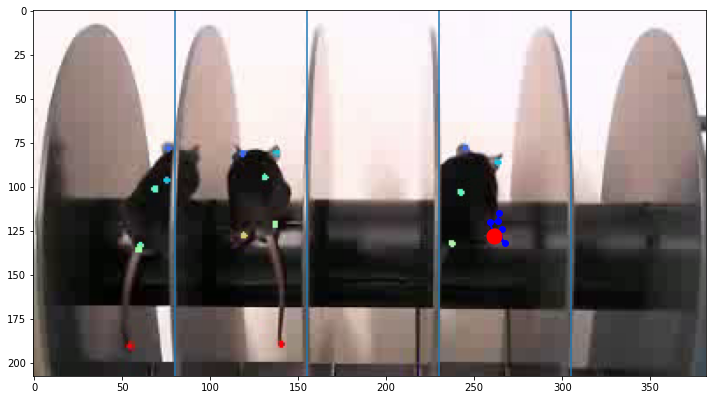

In [ ]:
bp = 'righthindlimb'
mouse = 'mus3'
tp = 1500
step=10
fig, ax = plt.subplots(figsize=(10, 8))
x = df[mouse][bp]['x']
y = df[mouse][bp]['y']
l = df[mouse][bp]['likelyhood']
ax.imshow(vid.get_data(tp), )
x_tp = x[tp-(3*step):tp+(4*step):step]
y_tp = y[tp-(3*step):tp+(4*step):step]
ax.plot(x_tp, y_tp, 'bo-', lw=2)
ax.plot(x[tp], y[tp], 'ro', ms=15)
ax.xaxis.set_visible(True)
ax.yaxis.set_visible(True)
ax.axvline(x=80)
ax.axvline(x=155)
ax.axvline(x=230)
ax.axvline(x=305)
fig.tight_layout()

#] Task 3 :

## How long did the mouse last ? 

In [ ]:
myList = df['mus1'].eq(df['mus1'].iloc[:, 0], axis=0).all(1)

In [ ]:
df['mus5']

In [ ]:
np.where(df[mouse].eq(df[mouse].iloc[:, 0], axis=0).all(1) == True)

(array([], dtype=int64),)

In [ ]:
df["mus3"]

In [ ]:
np.where(myList == True)[0][0]

1624

In [ ]:
df1 = df.loc[:, df.columns.get_level_values(2) != 'likelyhood']

In [ ]:
mouse = 'mus3'
df1[mouse].eq(df1[mouse].iloc[:, 0], axis=0).all(1)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

In [ ]:
for mouse in ['mus1', 'mus2', 'mus3', 'mus4', 'mus5']:
  print(mouse, " : ", np.where(df1[mouse].eq(df1[mouse].iloc[:, 0], axis=0).all(1) == True)[0][0])

In [ ]:
for mouse in ['mus1', 'mus2', 'mus4', 'mus5']:
  print(mouse, " : ", np.where(df[mouse].eq(df[mouse].iloc[:, 0], axis=0).all(1) == True)[0][0])

mus1  :  1624
mus2  :  1624
mus4  :  1088
mus5  :  0


# Data Exploration :

In [ ]:
df['mus1'].value_counts()

(nose, x)  (nose, y)  (nose, likelyhood)  (leftEar, x)  (leftEar, y)  (leftEar, likelyhood)  (rightEar, x)  (rightEar, y)  (rightEar, likelyhood)  (bodycentre, x)  (bodycentre, y)  (bodycentre, likelyhood)  (tailbase, x)  (tailbase, y)  (tailbase, likelyhood)  (lefthindlimb, x)  (lefthindlimb, y)  (lefthindlimb, likelyhood)  (righthindlimb, x)  (righthindlimb, y)  (righthindlimb, likelyhood)  (tailtip, x)  (tailtip, y)  (tailtip, likelyhood)
-1.000     -1.000     -1.0                -1.000        -1.000        -1.0                   -1.000         -1.000         -1.000                  -1.000           -1.000           -1.000                    -1.000         -1.000         -1.000                  -1.000             -1.000             -1.000                      -1.000              -1.000              -1.000                       -1.000        -1.000        -1.000                   806
                                           65.416        77.665        1.0                    76.375 

# Time series clustering :

In [ ]:
X_train = np.array([df['mus1'].to_numpy(), df['mus2'].to_numpy(), df['mus3'].to_numpy(), df['mus4'].to_numpy(), df['mus5'].to_numpy()])
X_train.shape

(5, 2430, 24)

In [ ]:
X_train = np.array([df['mus1'].to_numpy()])
X_train.shape

(1, 2430, 24)

In [ ]:
seed = 0
numpy.random.seed(seed)
X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)
# Make time series shorter
#X_train = TimeSeriesResampler(sz=40).fit_transform(X_train)
sz = X_train.shape[1]

# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=5, verbose=False, random_state=seed)
y_pred = km.fit_predict(X_train)

plt.figure(figsize=(20, 20))
for yi in range(3):
    plt.subplot(3, 3, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

# DBA-k-means
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=3,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          max_iter_barycenter=10,
                          random_state=seed)
y_pred = dba_km.fit_predict(X_train)

for yi in range(3):
    plt.subplot(3, 3, 4 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")

# Soft-DTW-k-means
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=3,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=seed)
y_pred = sdtw_km.fit_predict(X_train)

for yi in range(3):
    plt.subplot(3, 3, 7 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.show()